<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA of E-commerce Customer Behavior**

Conduct an exploratory data analysis (EDA) on the given E-commerce Customer Behavior. Focus on customer behavior, purchase trends, and satisfaction levels using Python libraries: Pandas, Numpy, Matplotlib, and Seaborn.

## Dataset Overview:

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Gender of the customer.
- **Age:** Age of the customer.
- **City:** City where the customer resides.
- **Membership Type:** Type of customer membership (Gold, Silver, Bronze).
- **Total Spend:** Total amount spent by the customer.
- **Items Purchased:** Number of items purchased.
- **Average Rating:** Average rating given by the customer.
- **Discount Applied:** Whether a discount was applied (True/False).
- **Days Since Last Purchase:** Number of days since the customer’s last purchase.
- **Satisfaction Level:** Customer's satisfaction level (Satisfied, Neutral, Unsatisfied).

## **Task**

### **Data Exploration**

Explore the dataset to get a general understanding of the data.

- Load the dataset using Pandas.
- Print the first 10 rows of the dataset.
- Display Statistical Summary. (show the summary for object data columns separately)
- Get the information, data types of all columns and the shape of the dataset (number of rows and columns).
- Display only Data types

(5 points)

In [49]:
# IPORTING PANDAS LIBRARY
import pandas as pd

In [50]:
# LOADING THE DATASET
df=pd.read_csv("/content/E-commerce Customer Behavior - E-commerce Customer Behavior (2).csv")

In [51]:
# Print the first 10 rows
print(df.head(10))


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   
5          106  Female   37        Houston          Bronze       440.80   
6          107  Female   31       New York            Gold      1150.60   
7          108    Male   35    Los Angeles          Silver       800.90   
8          109  Female   41        Chicago          Bronze       495.25   
9          110    Male   28  San Francisco            Gold      1520.10   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2     

In [52]:
# Display Statistical Summary for numerical columns
print(df.describe())


       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max    

In [53]:
# Display Statistical Summary for object (categorical) columns
print(df.describe(include=['object']))


        Gender      City Membership Type Satisfaction Level
count      350       350             350                348
unique       2         6               3                  3
top     Female  New York            Gold          Satisfied
freq       175        59             117                125


In [54]:
# Get information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None


In [55]:
# Display Data Types
print(df.dtypes)

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object


### **Handling Missing Values**
Identify and deal with any missing data.

- Check for missing values in the dataset.
- If missing values exist, Show the rows with missing values.
- If missing values exist, Decide whether to fill them (using the mean, median, etc.) or drop them and justify your choice.


(3 Points)

In [56]:
# As DataFrame named 'df'
missing_values = df.isnull().sum()
print(missing_values)

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [57]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

     Customer ID  Gender  Age     City Membership Type  Total Spend  \
71           172  Female   37  Houston          Bronze        420.8   
143          244  Female   37  Houston          Bronze        430.8   

     Items Purchased  Average Rating  Discount Applied  \
71                 7             3.1             False   
143                7             3.4             False   

     Days Since Last Purchase Satisfaction Level  
71                         21                NaN  
143                        23                NaN  


### **Duplicates**

- Check for duplicate records in the dataset. If duplicates exist, remove them.

(1 Point)

In [58]:
# Identify duplicate rows based on all columns
duplicates = df.duplicated()


In [59]:
# Display the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### **Conditional Filtering**
Filter data based on specific conditions.

- How many customers have the Gold membership type?
- Filter and display customers who spent more than $1,000.
- Identify customers from New York who applied a discount.

( 3 points)

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Filter for Gold members and count them
num_gold_members = df[df['Membership Type'] == 'Gold']
print("Number of Gold members:", num_gold_members)

Number of Gold members:      Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold       1120.2   
3            104    Male   30  San Francisco            Gold       1480.3   
6            107  Female   31       New York            Gold       1150.6   
9            110    Male   28  San Francisco            Gold       1520.1   
12           113  Female   30       New York            Gold       1200.8   
..           ...     ...  ...            ...             ...          ...   
335          436  Female   30       New York            Gold       1200.8   
338          439    Male   30  San Francisco            Gold       1460.5   
341          442  Female   31       New York            Gold       1140.6   
344          445    Male   28  San Francisco            Gold       1480.1   
347          448  Female   30       New York            Gold       1190.8   

     Items Purchased  Average Rating  Discount Appl

In [63]:
high_spenders = df[df['Total Spend'] > 1000]
print(high_spenders)

     Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold       1120.2   
3            104    Male   30  San Francisco            Gold       1480.3   
6            107  Female   31       New York            Gold       1150.6   
9            110    Male   28  San Francisco            Gold       1520.1   
12           113  Female   30       New York            Gold       1200.8   
..           ...     ...  ...            ...             ...          ...   
335          436  Female   30       New York            Gold       1200.8   
338          439    Male   30  San Francisco            Gold       1460.5   
341          442  Female   31       New York            Gold       1140.6   
344          445    Male   28  San Francisco            Gold       1480.1   
347          448  Female   30       New York            Gold       1190.8   

     Items Purchased  Average Rating  Discount Applied  \
0                

In [66]:
ny_customers_with_discount = df[(df['City'] == 'New York') & (df['Discount Applied'] == True)]
print(ny_customers_with_discount)

     Customer ID  Gender  Age      City Membership Type  Total Spend  \
0            101  Female   29  New York            Gold       1120.2   
6            107  Female   31  New York            Gold       1150.6   
12           113  Female   30  New York            Gold       1200.8   
18           119  Female   32  New York            Gold       1170.3   
24           125  Female   31  New York            Gold       1140.6   
30           131  Female   30  New York            Gold       1190.8   
36           137  Female   32  New York            Gold       1160.3   
42           143  Female   31  New York            Gold       1130.6   
48           149  Female   30  New York            Gold       1180.8   
54           155  Female   31  New York            Gold       1140.6   
60           161  Female   30  New York            Gold       1190.8   
66           167  Female   32  New York            Gold       1160.3   
72           173  Female   31  New York            Gold       11

### **Analysis**


 ( Hint: Group by, conditional filtering, Visualization )

##### Which membership type shows the highest total spending in the dataset?  (2 Points)

In [67]:
# DataFrame named 'df' with columns 'Membership Type' and 'Total Spend'

# Group the data by MembershipType and calculate the total spending for each group
total_spending_by_membership = df.groupby('Membership Type')['Total Spend'].sum()


In [68]:
# Find the membership type with the highest total spending
highest_spending_membership = total_spending_by_membership.idxmax()
highest_spending_amount = total_spending_by_membership.max()

print(f"The membership type with the highest total spending is: {highest_spending_membership}")
print(f"Total spending for this membership type: ${highest_spending_amount}")

The membership type with the highest total spending is: Gold
Total spending for this membership type: $153403.9


#### How does customer satisfaction impact total spending across different membership types? Which membership type spends more based on satisfaction levels? (2 Points)

In [69]:
# Group the data by MembershipType and CustomerSatisfaction, and calculate the total spending for each group
grouped_data = df.groupby(['Membership Type', 'Satisfaction Level'])['Total Spend'].sum().reset_index()


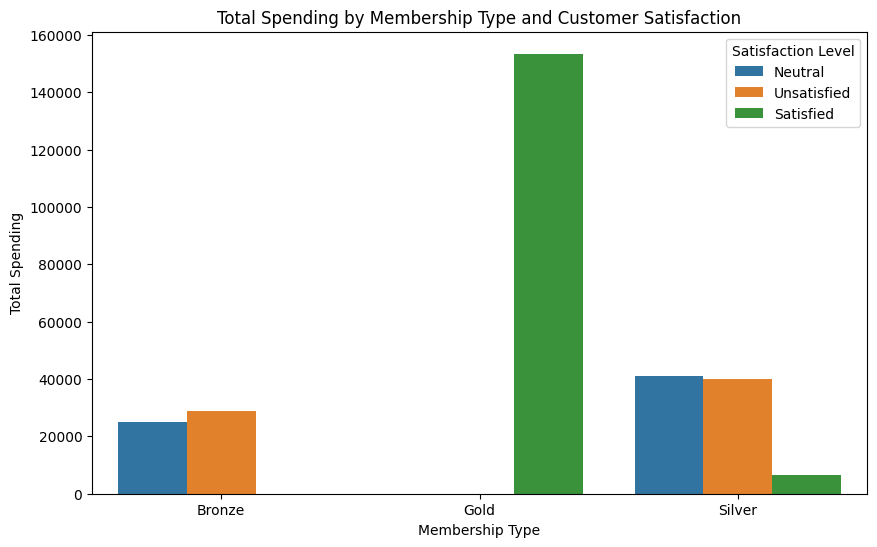

In [70]:
# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Membership Type', y='Total Spend', hue='Satisfaction Level', data=grouped_data)
plt.title('Total Spending by Membership Type and Customer Satisfaction')
plt.xlabel('Membership Type')
plt.ylabel('Total Spending')
plt.show()

#### What is the average rating for customers who applied discounts, and does the membership type have any effect on the ratings? (2 points)

In [71]:
# Calculate the average rating for customers who applied discounts
average_rating_with_discount = df[df['Discount Applied'] == True]['Average Rating'].mean()
print("Average rating for customers who applied discounts:", average_rating_with_discount)


Average rating for customers who applied discounts: 3.979428571428572


In [72]:
# Group the data by MembershipType and calculate the average rating for each group
average_rating_by_membership = df.groupby('Membership Type')['Average Rating'].mean()
print("Average rating by membership type:")
print(average_rating_by_membership)

Average rating by membership type:
Membership Type
Bronze    3.325000
Gold      4.675214
Silver    4.051282
Name: Average Rating, dtype: float64


#### Analyze the Impact of Days Since Last Purchase on Satisfaction Level (2 Points)

In [75]:
# Group the data by Satisfaction Level and calculate the average DaysSinceLastPurchase for each group
grouped_data = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean().reset_index()

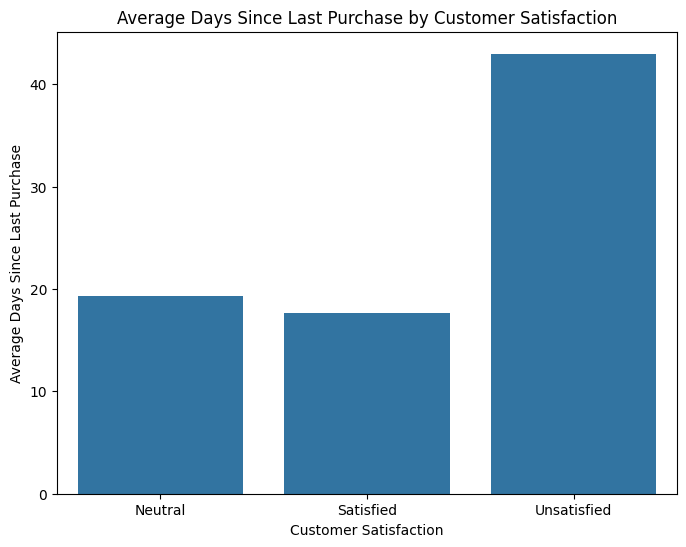

In [77]:
# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Satisfaction Level', y='Days Since Last Purchase', data=grouped_data)
plt.title('Average Days Since Last Purchase by Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Average Days Since Last Purchase')
plt.show()

In [78]:

bins = [0, 30, 60, 90, 120, 180, 360, float('inf')]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '121-180 days', '181-360 days', '360+ days']
df['Days Since Last Purchase Binned'] = pd.cut(df['Days Since Last Purchase'], bins=bins, labels=labels)

average_satisfaction = df.groupby('Days Since Last Purchase Binned')['Satisfaction Level'].value_counts(normalize=True).unstack().fillna(0)

average_satisfaction

<ipython-input-78-3f8d47d20d31>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_satisfaction = df.groupby('Days Since Last Purchase Binned')['Satisfaction Level'].value_counts(normalize=True).unstack().fillna(0)


Satisfaction Level,Neutral,Satisfied,Unsatisfied
Days Since Last Purchase Binned,,,
0-30 days,0.468750,0.531250,0.000000
31-60 days,0.016529,0.049587,0.933884
61-90 days,0.000000,0.000000,1.000000
91-120 days,0.000000,0.000000,0.000000
121-180 days,0.000000,0.000000,0.000000
181-360 days,0.000000,0.000000,0.000000
360+ days,0.000000,0.000000,0.000000


<Figure size 1000x600 with 0 Axes>

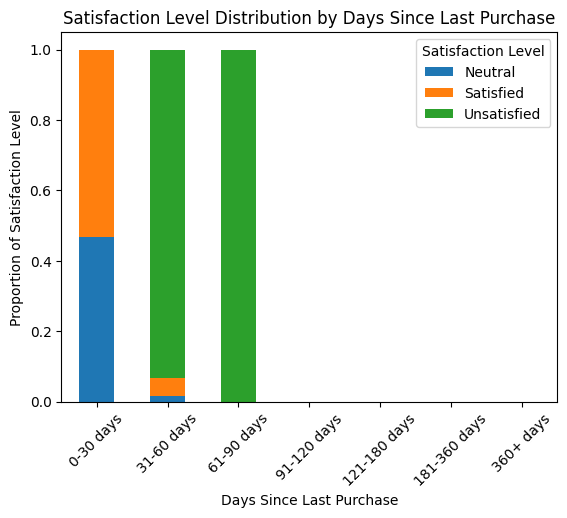

In [79]:
plt.figure(figsize=(10, 6))
average_satisfaction.plot(kind='bar', stacked=True)
plt.title('Satisfaction Level Distribution by Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Proportion of Satisfaction Level')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45)
plt.show()